# 0. Scikit-Learn Workflow

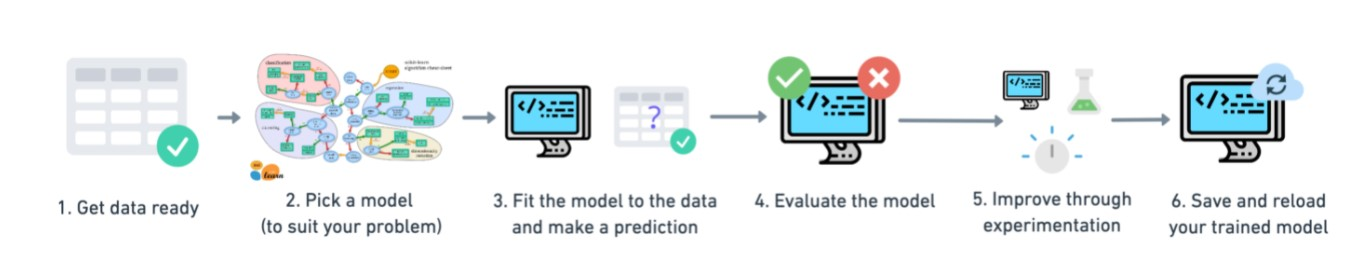

### => Standard imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Getting the data ready

There are three main steps:
1. Splitting data into feature vector & labels (`X` &`y`)
2. Filling(imputing) missing values or discarding missing values
3. Converting non-numerical values to numerical values(feature encoding)

In [2]:
heart_d=pd.read_csv("heart-disease.csv")
heart_d

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


   **Step 1: To split data into feature vector(X) & labes(y)**

In [3]:
X=heart_d.drop('target',axis=1) # We have to specify axis to let know the system that we're targeting a column
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [4]:
y=heart_d["target"]
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

**Step 2: Splitting data into Training and Test sets**

there is a model in Scikit-Learn package that splits the data 

In [5]:
from sklearn.model_selection import train_test_split
# this model splits the data set into 4 diffrent sets i.e train_x,train_y,test_x,test_y
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)


# test_size =0.2 indicates that split 20 percent(%) of data into test set and rest 80% as training set

In [6]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((242, 13), (242,), (61, 13), (61,))

In [7]:
heart_d.shape

(303, 14)

    So therefore out of 303 samples 242 are used to train the model and left 61 are used to test the model

### 1.1 : Turning all the data into numericals 

This is being done because computer can't understand string's so in order for a model to predict we need each and every bit of data in form of numbers

Since we can't use heart disease csv since it's all filled with numbers let's use another one 

In [8]:
car_s=pd.read_csv("car-sales-extended.csv")
car_s

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


With this data set we're going to predict the price given the features make,color,odo,door

In [9]:
# Splitting data into feature vector(X) & labels(y)

X=car_s.drop('Price',axis=1) # axis=1 indicating column
y=car_s['Price']

In [10]:
# Splitting X,y into training and test set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2) # i.e test set = 20% of dataframe

In [11]:
# Build a model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

ValueError: could not convert string to float: 'BMW'

This brings out this error `ValueError: could not convert string to float: 'Toyota' ` i.e it couldn't understand the string 

So in order to rectify we need to convert string into numbers so the machine can understand

In [13]:
# Turn categories into numbers 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_feat=['Make','Colour']
one_hot=OneHotEncoder()
transform=ColumnTransformer([("one_hot",
                               one_hot,
                               categorical_feat)],
                             remainder='passthrough')
#Basically this column transformer takes the "OneHotEncoder" 
#which then applies to all the "categorical_feat" and pass the ramianing rows as it is
transformed_x=transform.fit_transform(X)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        3.54310e+04, 4.00000e+00],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.92714e+05, 5.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        8.47140e+04, 4.00000e+00],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 4.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.15883e+05, 4.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 4.00000e+00]])

In [14]:
pd.DataFrame(transformed_x)

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,35431.0,4.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,192714.0,5.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,84714.0,4.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,154365.0,4.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,181577.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,35820.0,4.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,155144.0,3.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,66604.0,4.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,215883.0,4.0


**How does "OneHotEncoder" works:**
  
  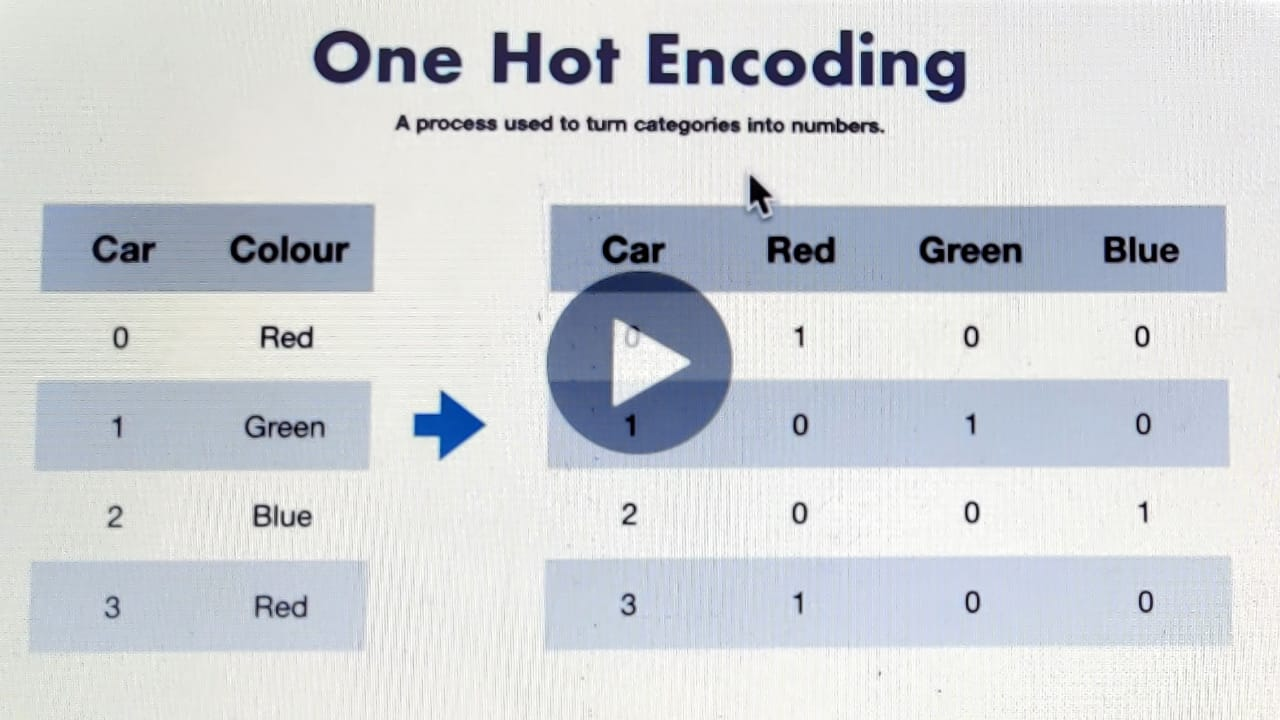

In [15]:
# There is another method in pandas

dummies =pd.get_dummies(car_s[['Make','Colour']])
dummies

,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,0,1,0,0,0,0,0,0,1
1,1,0,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0,0,1
3,0,0,0,1,0,0,0,0,1
4,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
995,0,0,0,1,1,0,0,0,0
996,0,0,1,0,0,0,0,0,1
997,0,0,1,0,0,1,0,0,0
998,0,1,0,0,0,0,0,0,1


In [16]:
# Refit the model
x_train,x_test,y_train,y_test=train_test_split(transformed_x,
                                               y,
                                               test_size=0.2)

model.fit(x_train,y_train)
model.score(x_train,y_train)

0.8930599624224254

In [17]:
model.score(x_test,y_test)

0.26331460272784846

### 1.2 Handling Missing values

1. This is either done by filling them which is known as "Imputing"
2. Deleting Missing values

In [18]:
## Import dataset that have missing values
missing_car=pd.read_csv("car-sales-extended-missing-data.csv")
missing_car

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [19]:
missing_car.isna().sum() # This sums up all the missing data

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [20]:
# Creating Feature Vector(X) & Label(y)

X=missing_car.drop('Price',axis=1)
y=missing_car['Price']

In [21]:
# Turn categories into numbers 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_feat=['Make','Colour']
one_hot=OneHotEncoder()
transform=ColumnTransformer([("one_hot",
                               one_hot,
                               categorical_feat)],
                             remainder='passthrough')
#Basically this column transformer takes the "OneHotEncoder" 
#which then applies to all the "categorical_feat" and pass the ramianing rows as it is
transformed_x=transform.fit_transform(X)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 4.00000e+00],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.92714e+05, 5.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 4.00000e+00],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 4.00000e+00],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 4.00000e+00]])

##### Option:1 Filling data with Pandas


In [22]:
## Filling "Make" column
missing_car['Make'].fillna("missing",inplace=True)

## Filling "Colour" column
missing_car['Colour'].fillna("missing",inplace=True)

## Filling "Odometer" column
missing_car['Odometer (KM)'].fillna(missing_car['Odometer (KM)'].mean(),inplace=True)

## Filling "Door" Column
missing_car['Doors'].fillna(4,inplace=True)

In [23]:
missing_car.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

We can't fill values for price since it is a target variable So we have to remove them

In [24]:
missing_car.dropna(inplace=True)

In [25]:
missing_car.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [26]:
X=missing_car.drop("Price",axis=1)
y=missing_car["Price"]

In [27]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

feat=['Make','Colour','Doors']
one=OneHotEncoder()
trans=ColumnTransformer([("one_hot",
                           one,
                           feat)],
                        remainder="passthrough")

trans_x=trans.fit_transform(missing_car)
trans_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

#### Option 2: Filling missing values using Scikit-Learn

In [28]:
car_missing=pd.read_csv("car-sales-extended-missing-data.csv")
car_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [29]:
car_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

    Since we can't have data that has missing target values i.e price therefore we remove all the row where price=NaN

In [30]:
car_missing.dropna(subset=["Price"],inplace=True)
car_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [31]:
len(car_missing) # initially they are 1000

950

In [32]:
# Split the data Frame into Feature Variable(X) & label(y)
X=car_missing.drop('Price',axis=1) # axis =1 implies the columns of data frame
y=car_missing['Price']

In [33]:
X.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
dtype: int64

In [34]:
# So here we're dealing with scikit learn
#Filling missing values using Scikit-Learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill Categorical values with "Missed" , Numerical Values with " mean "
cat_i=SimpleImputer(strategy="constant",fill_value="Missed")
door_i=SimpleImputer(strategy="constant",fill_value=4)
num_i=SimpleImputer(strategy="mean")

#Define columns
cat=["Make","Colour"]
doo=["Doors"]
num=["Odometer (KM)"]

#Create an imputer(A function that fills missing values)
imputer=ColumnTransformer([
    ("cat_i",cat_i,cat),
    ("door_i",door_i,doo),
    ("num_i",num_i,num)
],remainder="passthrough")

#create a new X that contains all the filled data
filled_x=imputer.fit_transform(X)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [35]:
c_missing_new=pd.DataFrame(filled_x,
                           columns=["Make","Colour","Doors","Odometer (KM)"])
c_missing_new

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4.0,35431.0
1,BMW,Blue,5.0,192714.0
2,Honda,White,4.0,84714.0
3,Toyota,White,4.0,154365.0
4,Nissan,Blue,3.0,181577.0
...,...,...,...,...
945,Toyota,Black,4.0,35820.0
946,Missed,White,3.0,155144.0
947,Nissan,Blue,4.0,66604.0
948,Honda,White,4.0,215883.0


In [36]:
c_missing_new.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [37]:
# Convert all non numerical to numerical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

cat_feat=["Make","Colour","Doors"]
one=OneHotEncoder()
trans=ColumnTransformer([("One_Hot",one,cat_feat)],remainder="passthrough")

trans_x=trans.fit_transform(c_missing_new)
trans_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [38]:
# Feed the data into a model
np.random.seed(5)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(trans_x,
                                            y,
                                             test_size=0.2)

model=RandomForestRegressor()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.27290109562778186

# 2. Choosing the right estimator/algortithm

refer the link https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

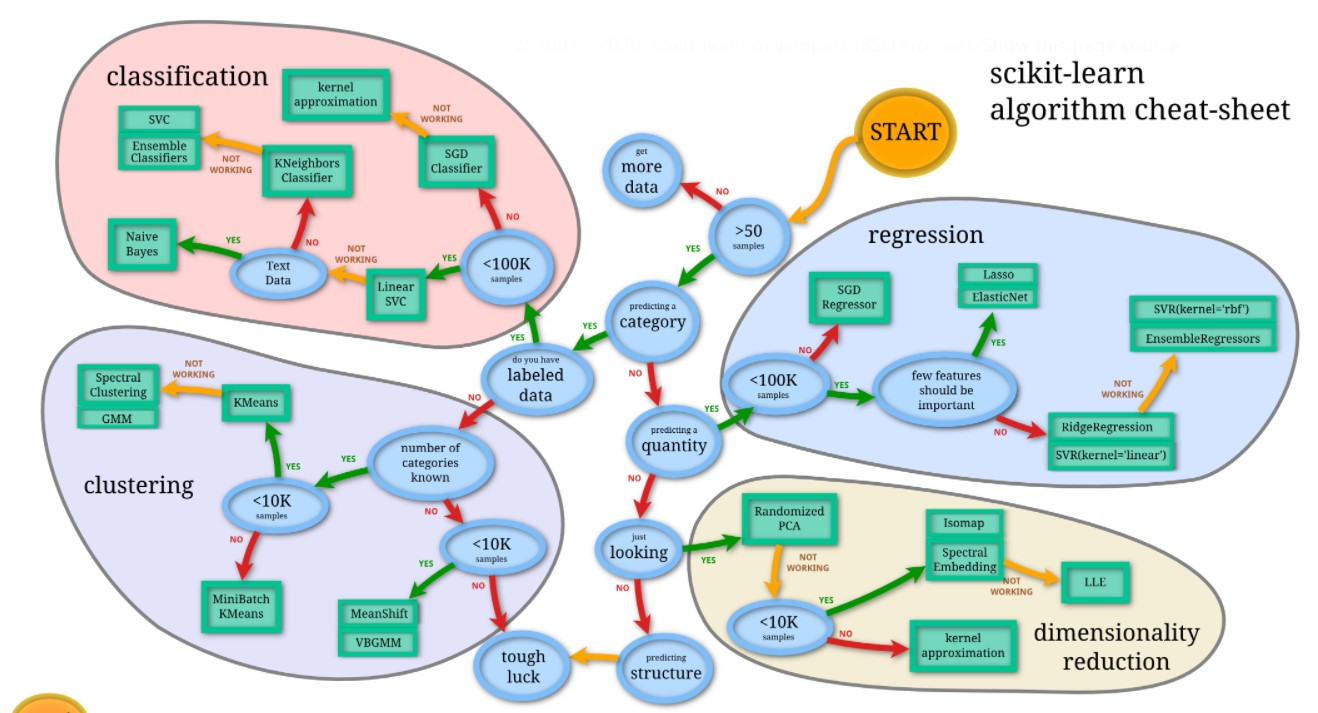

## 2.1: Regression Problem

In [39]:
### Finding best Regresssion model for Boston DataSet
from sklearn.datasets import load_boston
boston=load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

Since this is in a non-readable format we convert into a "DataFrame"

In [40]:
b_df=pd.DataFrame(boston['data'],columns=boston['feature_names'])
b_df['target']=pd.Series(boston['target'])
b_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


**We're using these features (CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT) to predict target price**

So therefore we need to use regression

In [41]:
# No of samples
len(b_df)

506

***From the SCIKIT-MAP we prefer to use Ridge model***

##### Trail :1 Ridge Model

In [42]:
# importing ridge model
from sklearn.linear_model import Ridge

# Set-up Random Seed
np.random.seed(5)

#Splitting data into Feature Variable(x) and label(y)
x=b_df.drop('target',axis=1)
y=b_df['target']

#Splitting data into train & test
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

#initalizing model
model=Ridge()
model.fit(xtrain,ytrain)

# testing model
model.score(xtest,ytest)

0.7241256474733335

***How to improve the score ?***

if Ridge is'nt working ,then
* From the SCIKIT-map the next model to test is "Random Forest" Method

##### Trail 2: Random-Forest method

In [43]:
#importing RandomForest method
from sklearn.ensemble  import RandomForestRegressor

#Set-up Random Seed
np.random.seed(5)

#Split the data into x & y
x=b_df.drop('target',axis=1)
y=b_df['target']

#split data into train & test 
xtra,xtes,ytra,ytes=train_test_split(x,y,test_size=0.2)

#initialize model
Rmodel=RandomForestRegressor()
Rmodel.fit(xtra,ytra)

#test model
Rmodel.score(xtes,ytes)

0.8716632849053344

In [44]:
model.score(xtest,ytest)

0.7241256474733335

## 2.2 Classification Problem

In [45]:
heart_d=pd.read_csv("heart-disease.csv")
heart_d.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [46]:
# Check whether we have 50 samples > or not
len(heart_d)

303

From the map we're going for trail 1 using `Linear SVC`

**Trail 1: Linear SVC**

In [47]:
#Import the package
from sklearn.svm import LinearSVC

#Set-up random seed
np.random.seed(40)

#Seperate data into Feature variable (x) and target variable (y)
x=heart_d.drop('target',axis=1)
y=heart_d['target']

# Splitting data into training and testing data
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2)

#initialize the model
model=LinearSVC()
model.fit(train_x,train_y)

#Evaluate LinearSVC
model.score(test_x,test_y)

C:\Users\Lenovo\Desktop\project_u\env\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.8852459016393442

In [48]:
heart_d['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

**Trail 2: Random-Forest Classifier**

In [49]:
#import the package
from sklearn.ensemble import RandomForestClassifier

#set-up random seed
np.random.seed(42)

#seperate the data into x & y
x=heart_d.drop('target',axis=1)
y=heart_d['target']

# split data for training and testing
xtra,xtes,ytra,ytes=train_test_split(x,y,test_size=0.2)

#Initiate the model
mod=RandomForestClassifier()
mod.fit(xtra,ytra)

#Test the model
mod.score(xtes,ytes)

0.8524590163934426

#### Note:
* if the data is Structured use Ensemble methods
* If the data is Unstructured use transfer Learning or Deep Learning

# 3. Fitting the model on data to make right prediction

* `x` : Feature Variable , feature vector, features
* `y`: Target,Target Variable,labesl

### 3.1 Fitting model to the data

***Fitting the data in the sense training the model from training data sets so that the model can predict patterns*** 

In [50]:
#import the package
from sklearn.ensemble import RandomForestClassifier

#set-up random seed
np.random.seed(42)

#seperate the data into x & y
x=heart_d.drop('target',axis=1)
y=heart_d['target']

# split data for training and testing
xtra,xtes,ytra,ytes=train_test_split(x,y,test_size=0.2)

#Initiate the model
mod=RandomForestClassifier()

#Fitting the data(Training the machine learning model)
mod.fit(xtra,ytra)

#Test the model
mod.score(xtes,ytes)

0.8524590163934426

### 3.2 Making Predictions using ML Model

2 Ways to make predictions:
1. `predict()` 
2. `predict_proba()`

**predict() method:**

In [51]:
mod.predict(xtes)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [52]:
np.array(ytes)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [53]:
predicted_y=mod.predict(xtes)
##This compares the predicted values by our model to actual result
np.mean(predicted_y == ytes)

0.8524590163934426

In [54]:
mod.score(xtes,ytes) # the value from above test and this are exactly the same

0.8524590163934426

In [55]:
# Another way of doing
from sklearn.metrics import accuracy_score
accuracy_score(ytes,predicted_y)

0.8524590163934426

**predict_proba() method:**

In [56]:
mod.predict_proba(xtes[:5])
# This actually returns the probabilities of each label in target variable i.e [1 or 0] or [yes or no]

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [57]:
mod.predict(xtes[:5]) 

array([0, 1, 1, 0, 1], dtype=int64)

**`predict()` can also be used for regression model**

In [58]:
b_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [59]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(5)

x=b_df.drop('target',axis=1)
y=b_df['target']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(xtrain,ytrain)

#make prediction
pred_y=model.predict(xtest)



In [60]:
pred_y[:10]

array([47.138, 27.993, 23.204, 11.722, 41.524,  8.1  , 26.837, 26.128,
       23.677, 19.625])

In [61]:
np.array(ytest[:10])

array([37.6, 27.9, 22.6, 13.8, 35.2, 10.4, 23.9, 29. , 22.8, 23.2])

In [62]:
# Comparing the predictions
from sklearn.metrics import mean_absolute_error

mean_absolute_error(pred_y,ytest)

2.139941176470587

# 4. Evaluating the ML model

https://scikit-learn.org/stable/modules/model_evaluation.html

There are three ways to evaluate a model
1. `score` method
2. `scoring` parameter
3. problem specific metric functions

### 4.1 Evaluating a model with `score` method

In [63]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(4)

x= heart_d.drop('target',axis=1)
y=heart_d['target']

xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.2)

clf=RandomForestClassifier()

clf.fit(xtr,ytr)

RandomForestClassifier()

In [64]:
clf.score(xtr,ytr)

1.0

In [65]:
clf.score(xte,yte)

0.8852459016393442

**Similarily for "Regression"  :**

In [66]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(5)

x=b_df.drop('target',axis=1)
y=b_df['target']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

model=RandomForestRegressor()
model.fit(xtrain,ytrain)
    

RandomForestRegressor()

In [67]:
model.score(xtest,ytest)

0.8716632849053344

**Note:**
1. For Regression the `score ()` Return the coefficient of determination :math:`R^2` of the prediction.
2. For Classification `score()` Return the mean accuracy on the given test data and labels.

### 4.2 Evaluating a model using `scoring` parameter

**In order to do that we need to import `cross_val_score` from `model_selection` package**

**Trail on Classification model:**

In [68]:
from sklearn.model_selection import cross_val_score 

#Deploy a classification model
np.random.seed(4)
from sklearn.ensemble import RandomForestClassifier

x=heart_d.drop('target',axis=1)
y=heart_d["target"]

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

clf=RandomForestClassifier()
clf.fit(xtrain,ytrain)



RandomForestClassifier()

**Working of `cross_val_score` :**

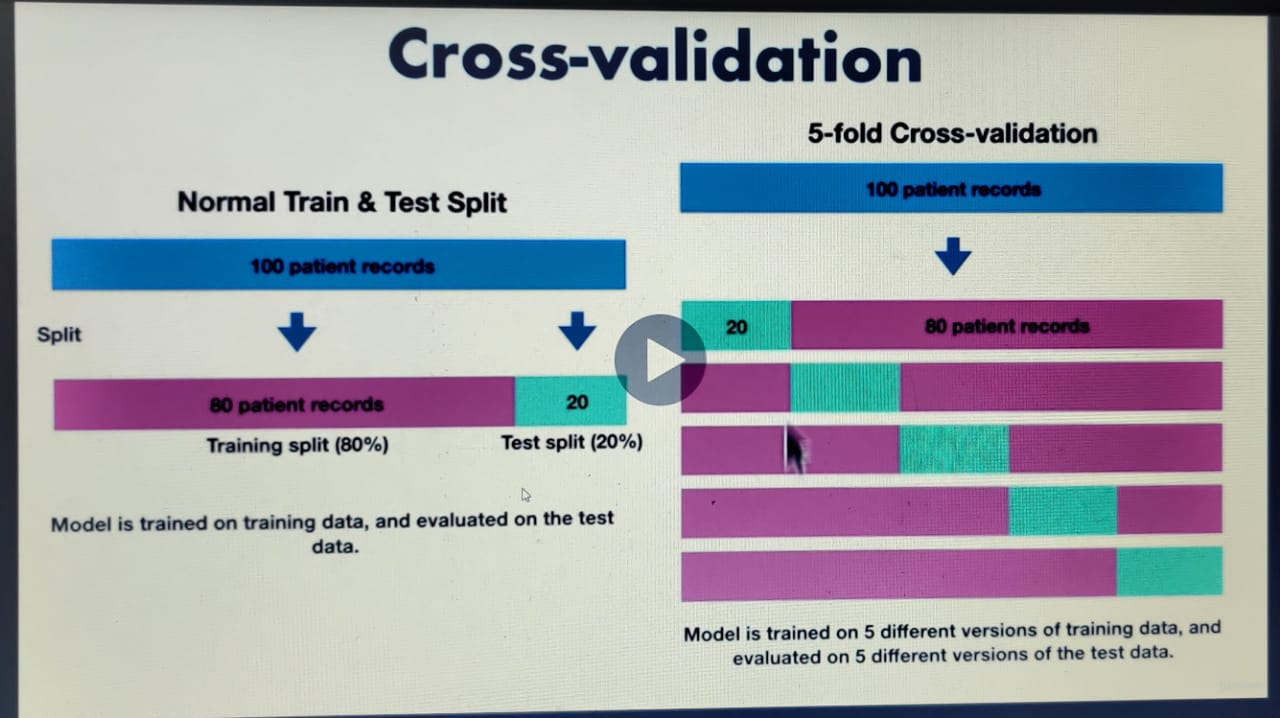

In [69]:
## score() method to compare
clf.score(xtest,ytest)

0.8852459016393442

The output produced by `cross_val_score` is an array 

In [70]:
cross_val_score(clf,x,y,cv=5) #5-fold cross validation
#Here " cv='n' " is the no that represents how many time the model get trained on 'n' diffrent versions of training data

# default values of cv=5

array([0.78688525, 0.8852459 , 0.80327869, 0.8       , 0.78333333])

In [71]:
cross_val_score(clf,x,y,cv=10) #10-fold cross validation

array([0.90322581, 0.80645161, 0.87096774, 0.93333333, 0.93333333,
       0.76666667, 0.7       , 0.86666667, 0.76666667, 0.76666667])

In [72]:
np.random.seed(42)

#single training test split
single=clf.score(xtest,ytest)

#mean of 5-fold cross validation
cross_val=np.mean(cross_val_score(clf,x,y,cv=5))

# compare both
single,cross_val

(0.8852459016393442, 0.8248087431693989)

**In order to give accurate info about the model we should always consider `cross_val_score`**

#### Note :
* The `scoring` parameter is set to "None" by default 
* when it is set to "None" it uses the model method of scoring 
* In our case , default scoring parameter of classifier = `mean accuracy()`

In [73]:
cross_val_score(clf,x,y,cv=10,scoring=None)

array([0.90322581, 0.80645161, 0.83870968, 0.9       , 0.9       ,
       0.83333333, 0.73333333, 0.83333333, 0.73333333, 0.83333333])

### 4.2.1 Classification model evaluation metrics

1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report

**Accuracy :**

In [74]:
from sklearn.model_selection import  cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x=heart_d.drop('target',axis=1)
y=heart_d['target']

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

clf=RandomForestClassifier()

clf.fit(xtest,ytest)
val_score=cross_val_score(clf,x,y)
val_score

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [75]:
print(f"Heart disease accuracy: {np.mean(val_score)*100:2f}%")

Heart disease accuracy: 81.163934%


**Area under "Reciever Operating Characteristic" Curve (ROC/AUC) :**


ROC curves are comparsion of model's true positive rate(tpr) versus false positive rate (fpr)

* True Positive Rate: model predicts 1 when truth is 1
* False Positive Rate: model predicts 0 when truth is 1
* True Negative=model predicts 0 when truth is 0
* false negative = model predicts 0 whem truth is 1 

In [76]:
from sklearn.metrics import roc_curve
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

y_prob=clf.predict_proba(xtest)

y_prob[:10]

array([[0.83, 0.17],
       [0.02, 0.98],
       [0.62, 0.38],
       [0.04, 0.96],
       [0.13, 0.87],
       [0.03, 0.97],
       [0.36, 0.64],
       [0.88, 0.12],
       [0.41, 0.59],
       [0.08, 0.92]])

For the 1st sample 0.94 is probability of label=0 & 0.06 is probability of label = 1

In [77]:
# So we only need positive probabilities i.e label = 1 therefore
yprob_positive=y_prob[:,1]
yprob_positive

array([0.17, 0.98, 0.38, 0.96, 0.87, 0.97, 0.64, 0.12, 0.59, 0.92, 0.87,
       0.37, 0.99, 0.04, 0.56, 1.  , 0.16, 0.11, 0.64, 0.84, 0.96, 0.51,
       0.13, 0.11, 0.94, 0.74, 0.66, 0.68, 0.51, 0.89, 0.97, 0.1 , 0.99,
       0.84, 0.75, 0.51, 0.43, 0.82, 0.98, 0.92, 0.06, 0.73, 0.15, 0.64,
       0.66, 0.77, 0.66, 0.7 , 0.91, 0.91, 0.33, 0.46, 0.81, 0.94, 0.88,
       0.87, 0.33, 0.32, 0.29, 0.06, 0.98])

In [78]:
# Caliculate fpr,tpr,threshold
fpr,tpr,threshold = roc_curve(ytest,yprob_positive)

# check false positive rate
fpr

array([0.        , 0.        , 0.        , 0.03846154, 0.03846154,
       0.03846154, 0.03846154, 0.03846154, 0.03846154, 0.11538462,
       0.11538462, 0.26923077, 0.34615385, 0.34615385, 0.38461538,
       0.38461538, 0.46153846, 0.53846154, 0.53846154, 0.76923077,
       0.84615385, 0.88461538, 0.96153846, 1.        ])

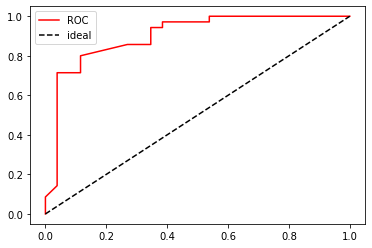

In [79]:
# Creating a function that plots tpr vs fpr i.e ROC curve
import matplotlib.pyplot as plt 
%matplotlib inline

def plot_roc(fpr,tpr):
    
    #plot roc 
    plt.plot(fpr,tpr,color="red",label="ROC")
    
    #plot an ideal line i.e x=y line
    plt.plot([0,1],[0,1],color="black",label="ideal",linestyle="--")
    
    #customize the plot
    plt.title="ROC Curve"
    plt.xlabel="fpr"
    plt.ylabel="tpr"
    plt.legend()
    plt.show()
    

plot_roc(fpr,tpr)
    

In [80]:
# to get the "Area Under Curve" (AUC)

from sklearn.metrics import roc_auc_score
roc_auc_score(ytest,yprob_positive)

0.9

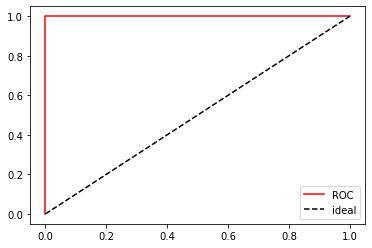

In [81]:
# Perfect ROC Curve 

fpr,tpr,threshold=roc_curve(ytest,ytest)
plot_roc(fpr,tpr)

In [82]:
# Area of perfect ROC curve
roc_auc_score(ytest,ytest)

1.0

**Confusion Matrix:**

* It is way of comparing between predicted values and actual values

* It gives us an idea where model is getting confused

In [83]:
from sklearn.metrics import confusion_matrix

ypred=clf.predict(xtest)

confusion_matrix=(ytest,ypred)

In [84]:
#visualizing confusion matrix
pd.crosstab(ytest,
            ypred,
            rownames=["actual"],
            colnames=["predicted"])

predicted,0,1
actual,,
0,17,9
1,2,33


In [85]:
# making our confusion matrix more visual using " Seaborn heatmap() "

#import seaborn as sns

Since here seaborn is not installed therefore instead of loading from prompt we can directly install from notebook using

**installing directly from notebook:**

In [86]:
#import sys
#!conda install --yes --prefix {sys.prefix} seaborn

<AxesSubplot:>

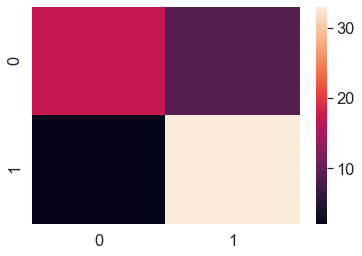

In [87]:
# making our confusion matrix more visual using " Seaborn heatmap() "
from sklearn.metrics import confusion_matrix
import seaborn as sns

# set the font size
sns.set(font_scale=1.5)

#create a confusion matrix
conf = confusion_matrix(ytest,ypred)

#plot using heatmap()
sns.heatmap(conf)

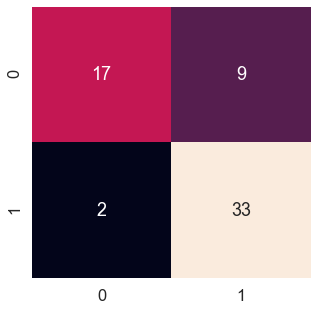

In [88]:
def plot_confMat(conf):
    """
    plotting a confusion matrix
    
    """
    fig,ax=plt.subplots(figsize=(5,5))
    ax=sns.heatmap(conf,
                   annot=True, # annote the boxes with confusion matrix info
                   cbar=False)

    
plot_confMat(conf)

**Classification Report:**

In [89]:
from sklearn.metrics import classification_report

print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.89      0.65      0.76        26
           1       0.79      0.94      0.86        35

    accuracy                           0.82        61
   macro avg       0.84      0.80      0.81        61
weighted avg       0.83      0.82      0.81        61



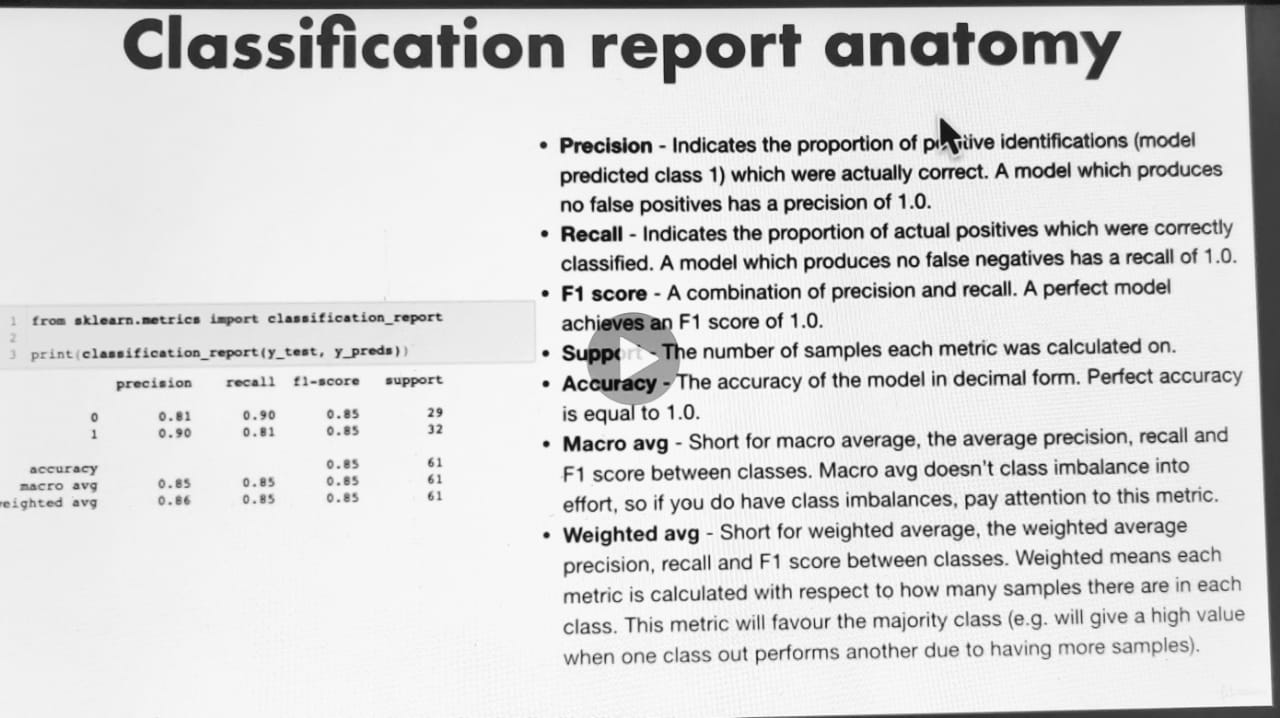

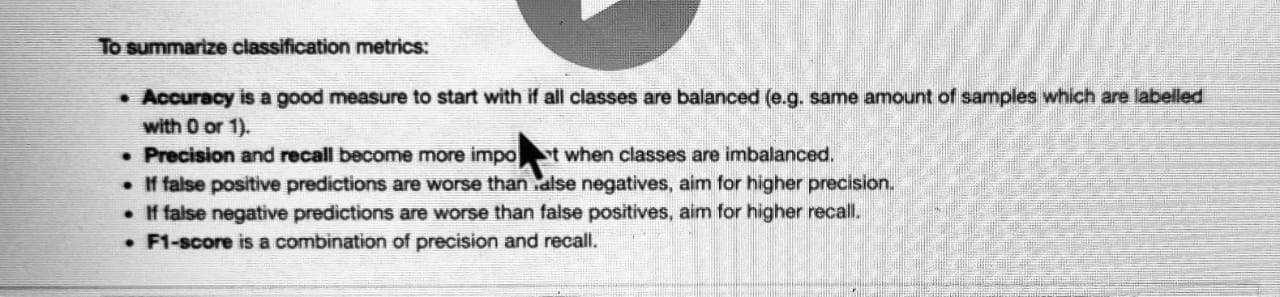

### 4.2.2 Regression model evaluation metrics


1. R-Squared or coefficient of determination (r^2)
2. Mean Absolute Error (MAE)
3. Mean squared error (MSE)

In [90]:
# Regression Model:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(4)

x=b_df.drop('target',axis=1)
y=b_df['target']

reg=RandomForestRegressor()

xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.2)

reg.fit(xtr,ytr)

RandomForestRegressor()

**R-Squared (R^2) :**

score() : which is the default method is used to return R^2 or coefficient of determination

R^2, It actually compares model predicted value to the mean of targets.

* Range of R2 score is from negative infinity to 1

In [91]:
reg.score(xte,yte)

0.8130380078489517

In [92]:
# Another way of implementing R^2 :
from sklearn.metrics import r2_score

#fill an array with mean of yte{Y-test}
y_test_mean=np.full(len(yte),np.mean(yte))

yte.mean()

23.461764705882352

In [93]:
y_test_mean[:5] , len(y_test_mean)

(array([23.46176471, 23.46176471, 23.46176471, 23.46176471, 23.46176471]), 102)

In [94]:
# Case:1  If all our model predicts is mean of targets then R2 score=0

r2_score(yte,y_test_mean)

0.0

In [95]:
# Case:2 If our model perfectly predicts the range of number then R2 score =1

r2_score(yte,yte)

1.0

**Mean Absolute Error (MAE):**

It is the average of the diffrence between "Predicted Values" & "Actual Values"

In [96]:
from sklearn.metrics import mean_absolute_error

y_pred=reg.predict(xte)

mae=mean_absolute_error(yte,y_pred)
mae

2.3808823529411773

In [97]:
df=pd.DataFrame(data={"actual value":yte,
                      "predicted value":y_pred,
                      "Diffrence":yte-y_pred})
df

,actual value,predicted value,Diffrence
8,16.5,18.410,-1.910
289,24.8,24.819,-0.019
68,17.4,19.104,-1.704
211,19.3,19.694,-0.394
226,37.6,47.576,-9.976
...,...,...,...
368,50.0,29.411,20.589
144,11.8,14.653,-2.853
336,19.5,19.397,0.103
437,8.7,9.416,-0.716


**Mean Squared Error(MSE) :**

* It is similar to MAE but it squares the diffrences then takes avereage of those squared diffrences

In [98]:
# MSE:

from sklearn.metrics import mean_squared_error

mse=mean_squared_error(yte,y_pred)
mse

17.36675443137256

In [99]:
#Verify:
sq=np.square(df["Diffrence"])
sq.mean()

17.36675443137256

### Note:

While making a regression model:
1. Minimise mean squared(MSE) as well as minimise mean absolute (MAE)
2. But, Maximise R-Squared (R^2)

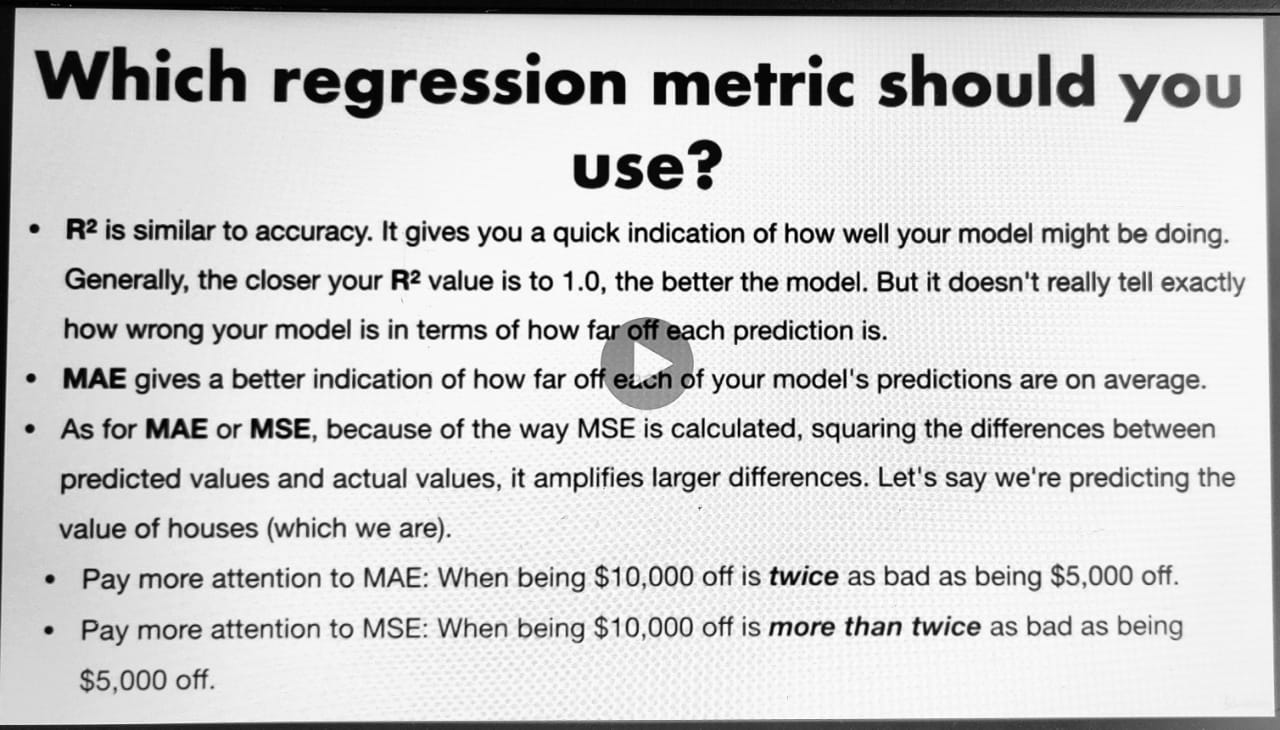

### 4.2.3 `SCORING` parameter - part 2



In [100]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(5)

x=heart_d.drop('target',axis=1)
y=heart_d['target']

clf=RandomForestClassifier()
clf

RandomForestClassifier()

In [101]:
np.random.seed(5)

cross_v=cross_val_score(clf,x,y,cv=5,scoring=None)
cross_v

array([0.81967213, 0.8852459 , 0.81967213, 0.8       , 0.76666667])

In [102]:
# Cross val accuracy
print(f'The accuracy of cross-val score :{np.mean(cross_v)*100:.2f}%')

The accuracy of cross-val score :81.83%


When scoring is set to None it uses default method of classifier in this case it uses the score method i.e score return the accuracy therefore when scoring is none it use score method

In [103]:
## case: 1 when scoring is "Accuracy"
cv_accu=cross_val_score(clf,x,y,cv=5,scoring="accuracy")
print(f'The accuracy of cross-val score :{np.mean(cross_v)*100:.2f}%')
# the result is same as when scoring set to none

The accuracy of cross-val score :81.83%


In [104]:
## case 2: scoring="precision" it gives out all "no of False-Positives"

cv_prec=cross_val_score(clf,x,y,cv=5,scoring="precision")
np.mean(cv_prec)

0.820954664341761

In [105]:
## case 3: scoring="recall" it gives out all " no of False-Negatives"
cv_recall=cross_val_score(clf,x,y,cv=5,scoring="recall")
np.mean(cv_recall)

0.8606060606060606

In [106]:
## case 4: scoring="f1" [which is combination of recall & precision]
cv_f1=cross_val_score(clf,x,y,cv=5,scoring="f1")
np.mean(cv_f1)

0.8430459974747825

### **For Regression Model:**

In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(5)

x=b_df.drop('target',axis=1)
y=b_df['target']

reg=RandomForestRegressor()

**Note :**
    The default scoring parameter for regression models is `r2` when "scoring=None"

In [108]:
np.random.seed(5)
cv=cross_val_score(reg,x,y,cv=5,scoring=None)
np.mean(cv),cv

(0.6337834602868833,
 array([0.75560016, 0.86374113, 0.71038961, 0.48104596, 0.35814044]))

In [109]:
## case 1: R^2 score
np.random.seed(5)
cv_r2=cross_val_score(reg,x,y,cv=5,scoring="r2")
np.mean(cv_r2),cv_r2

(0.6337834602868833,
 array([0.75560016, 0.86374113, 0.71038961, 0.48104596, 0.35814044]))

In [110]:
## case 2 : Mean Absolute Error (MAE)
np.random.seed(5)
cv_mae=cross_val_score(reg,x,y,cv=5,scoring="neg_mean_absolute_error")
np.mean(cv_mae),cv_mae

(-2.984555115511551,
 array([-2.15966667, -2.55383168, -3.46490099, -3.76164356, -2.98273267]))

        Negative values are used because "Higher return values are better than lower return values" i.e these negative values are closer to zero nd zero is higher 

In [111]:
## case 3: Mean Squared Error
np.random.seed(5)
cv_mse=cross_val_score(reg,x,y,cv=5,scoring="neg_mean_squared_error")
np.mean(cv_mse),cv_mse

(-21.324686550456214,
 array([ -8.44039602, -12.40456557, -23.19408635, -45.51841949,
        -17.06596533]))

## 4.3 Evaluating a model with Scikit-Learn functions

**Classification evaluation functions**

In [112]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(5)

x=heart_d.drop('target',axis=1)
y=heart_d['target']

xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.2)

clf=RandomForestClassifier()
clf.fit(xtr,ytr)

#Predictions
ypred=clf.predict(xte)

#Evaluation
print(f'Acccuracy:{accuracy_score(yte,ypred)*100:.2f}%')
print(f'Recall:{recall_score(yte,ypred)}%')
print(f'Precision:{precision_score(yte,ypred)}%')
print(f'F1:{f1_score(yte,ypred)}%')




Acccuracy:88.52%
Recall:0.9354838709677419%
Precision:0.8529411764705882%
F1:0.8923076923076922%


**Regression Evaluation Function:**

In [113]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(4)

x=b_df.drop('target',axis=1)
y=b_df['target']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

model = RandomForestRegressor()

model.fit(x_train,y_train)

y_preds=model.predict(x_test)

print(f'R^2 Score:{r2_score(y_test,y_preds)}')
print(f'MAE Score:{mean_absolute_error(y_test,y_preds)}')
print(f'MSE Score:{mean_squared_error(y_test,y_preds)}')

R^2 Score:0.8130380078489517
MAE Score:2.3808823529411773
MSE Score:17.36675443137256


# 5.Improving a model

* First model= Baseline Model
* First Prediction=Baseline prediction

There are 2 ways to improve a model

1. From a data perspective:
 * Could we improve our data?
 * Could we collect more data i.e(More data the better at prediction)

2. From a model perspective:
 * Can we use a better model ?
 * Can we improve the existing model 
 
 
**Hyperparameters vs Parameters:**

* Parameters= model find these patterns in data
* Hyperparameters = setting on a model we can tune to improve it's ability to find patterns

**Three ways to adjust hyperparameters :**
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [114]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier()

In [115]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

## 5.1 Tuning Hyperparameters by Hand

In order to do that we need to split data into 3 sets:
1. Training data (On which model is trained)
2. Validation data (model's hyperparameters gets tuned on this set)
3. Test data (Model is evaluated on this data set)

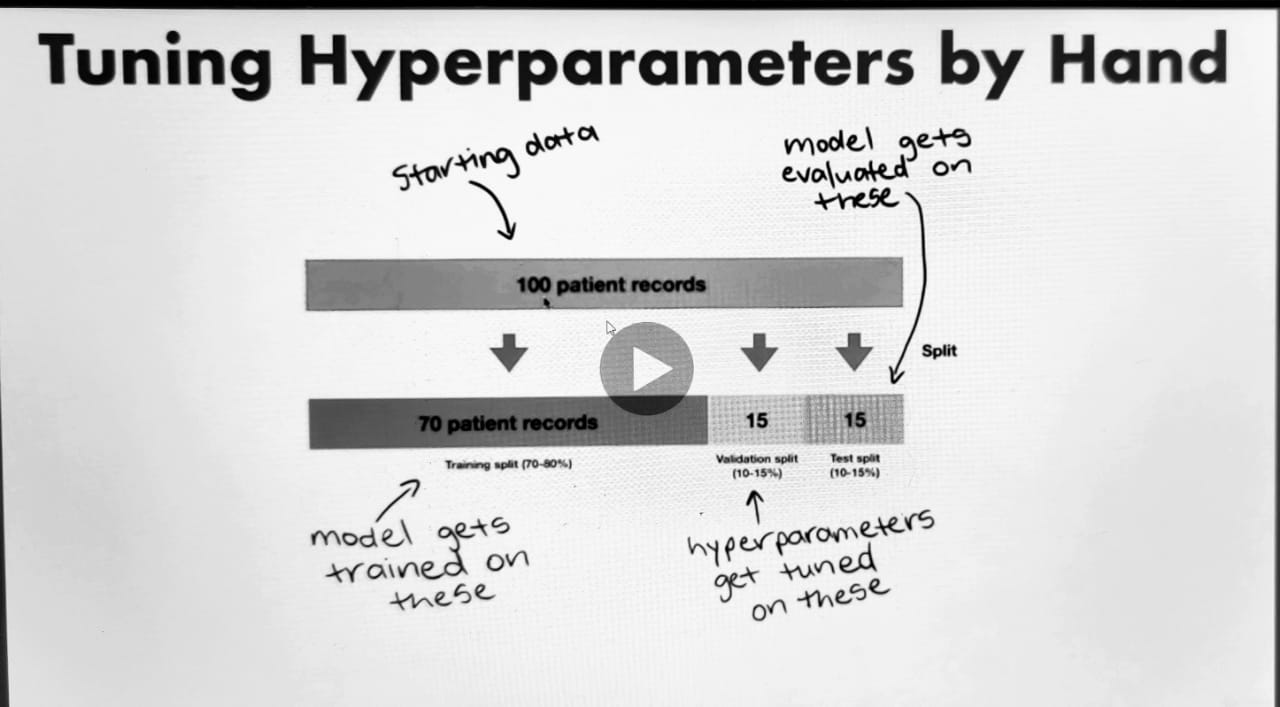

In [116]:
# Consider parameters of our classification model:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

From doctumentation we learn that we're going to adjust these hyper parameters:
1. `max_depth`
2. `max_features`
3. `min_sample_leaf`
4. `min_saample_split`
5. `n_estimators`

In [117]:
# Creaing an "Evaluating funtion" for classification model:

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

def clf_ev(ytrue,ypred):
    acc=accuracy_score(ytrue,ypred)
    pre=precision_score(ytrue,ypred)
    rec=recall_score(ytrue,ypred)
    f1=f1_score(ytrue,ypred)
    
    print(f'accuracy={acc*100:.2f}%')
    print(f'precision={pre}%')
    print(f'recall={rec}%')
    print(f'F1={f1}%')
    


In [118]:
#Create a model:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(5)

#Shuffle the data set:
shuffled_hd=heart_d.sample(frac=1)

#split into x & y
x=shuffled_hd.drop('target',axis=1)
y=shuffled_hd['target']

# In order to split data into 3 sets we dont have a function therefore we have to do it manually
train_split=round(0.7*len(shuffled_hd)) #70% of data
val_split=round(train_split+0.15*len(shuffled_hd))
xtr,ytr=x[:train_split],y[:train_split]
xval,yval=x[train_split:val_split],y[train_split:val_split]
xte,yte=x[val_split:],y[val_split:]

clf=RandomForestClassifier()

clf.fit(xtr,ytr)

#Baseline Predictions on validation set
ypred_b=clf.predict(xval)



#baseline evaluation
eval_b=clf_ev(yval,ypred_b)

accuracy=84.44%
precision=0.782608695652174%
recall=0.9%
F1=0.8372093023255814%


In [119]:
## make another model with change in parameters:
np.random.seed(5)
clf_2=RandomForestClassifier(n_estimators=1,max_depth=50)

clf_2.fit(xtr,ytr)

ypred_2=clf.predict(xval)

eval_clf2=clf_ev(yval,ypred_2)

accuracy=84.44%
precision=0.782608695652174%
recall=0.9%
F1=0.8372093023255814%


## 5.2 Hyperparameter tuning using RandomizedSearchCV

In [120]:
from sklearn.model_selection import RandomizedSearchCV

## create a dictionary of parameters that needd to adjusted and their diffrent intake values

grid={"n_estimators":[10,5,100],
      "max_depth":[None,5,10,20,30],
      "max_features":['auto','sqrt'],
      "min_samples_split":[2,4,6],
      "min_samples_leaf":[1,2,4]}

np.random.seed(5)

# split into x& y
x=shuffled_hd.drop('target',axis=1)
y=shuffled_hd['target']

# split into train and test set
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)

# instantiate classifier
clf=RandomForestClassifier(n_jobs=1) 
# n_jobs = no of processors our system should allocate for this model when "n_jobs=-1" it uses all the processors

#set-up randomizedsearchcv
rs_clf=RandomizedSearchCV(estimator=clf,
                          param_distributions=grid,
                          n_iter=10, # It tells how many times alteration of grid should be used on clf
                          cv=5,# cross validation set
                          verbose=2)

# Fitting randomizedsearchCV

rs_clf.fit(xtrain,ytrain);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=6, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=4, n_estimato

In [121]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': None}

In [122]:
# Make prediction with best parameters
rs_ypred=rs_clf.predict(xtest)

# evaluate prediction
rs_result=clf_ev(ytest,rs_ypred)

accuracy=78.02%
precision=0.8125%
recall=0.78%
F1=0.7959183673469388%


## 5.3 Hyperparameter tuning with GridSearchCV

It is similar to "RandomSearchCV" the main diffrence is it doesn't have "n_iter" parameters i.e it will go through all the permutations of grid in previous case it test all the 270 cases ot iterations it does take lot of time .

In [123]:
grid

{'n_estimators': [10, 5, 100],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [124]:
grid_2={"n_estimators":[10,100],
      "max_depth":[None],
      "max_features":['auto','sqrt'],
      "min_samples_split":[4,6],
      "min_samples_leaf":[2,4]}

In [125]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(5)

# split into x& y
x=shuffled_hd.drop('target',axis=1)
y=shuffled_hd['target']

# split into train and test set
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3)

# instantiate classifier
clf=RandomForestClassifier(n_jobs=1) 
# n_jobs = no of processors our system should allocate for this model when "n_jobs=-1" it uses all the processors

#set-up gridsearchcv
gs_clf=GridSearchCV(estimator=clf,
                    param_grid=grid_2,
                    cv=5,# cross validation set
                    verbose=2)

# Fitting gridsearchCV

gs_clf.fit(xtrain,ytrain);

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_est

[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=6, n_estimators=10; total time=   0.0s
[CV] END max_depth=None, max_

In [126]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 10}

In [127]:
gs_ypred=gs_clf.predict(xtest)

gs_result=clf_ev(ytest,gs_ypred)

accuracy=84.62%
precision=0.875%
recall=0.84%
F1=0.8571428571428572%


# 6. Saving and loading trained ML model:

This can be done in 2 ways:
1. With python `pickle` module
2. with `joblib` module

**Pickle:**

In [128]:
import pickle

# Save an existing model to file

pickle.dump(gs_clf,open("gridsearch_clf.pkl","wb")) # wb= write in binary 


In [129]:
# load as saved model
load_pickel=pickle.load(open("gridsearch_clf.pkl","rb")) # rb=readbinary

In [130]:
# # make predictions:
# pickle_ypred=load_pickel.predict(xtrain)
# clf_ev(ytest,pickle_ypred)

**joblib**

In [131]:
from joblib import dump , load

# save file
dump(gs_clf,filename="gridsearch_clf.joblib")

['gridsearch_clf.joblib']

In [132]:
# import a joblib model
loaded=  load(filename="gridsearch_clf.joblib")

In [133]:
# evaluate and predict
jb_ypred=loaded.predict(xtest)
clf_ev(ytest,jb_ypred)

accuracy=84.62%
precision=0.875%
recall=0.84%
F1=0.8571428571428572%


## PIPELINE